In [1]:
from supervised.automl import AutoML
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from contextlib import redirect_stdout
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
import seaborn as sns
import pickle


## 1. Models tuned

In [2]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder

### 1.1 Decision Tree

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
def decision_tree(X_train,X_test,y_train,y_test):
    clf = DecisionTreeRegressor()
    clf = clf.fit(X_train, y_train)
    return clf, np.sqrt(mean_squared_error(y_test, clf.predict(X_test)))


### 1.2 Random Forest

In [4]:
from sklearn.ensemble import RandomForestRegressor
def random_forest(X_train,X_test,y_train,y_test):
    #hyperparameter-tuning
    # Number of trees in random forest
    n_estimators = [100, 200, 300, 1000]

    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(50, 100,10)]

    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]

    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]

    # Method of selecting samples for training each tree
    bootstrap = [True, False]

    # Create the random grid
    grid = {'n_estimators': n_estimators,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap
            }

    clf = RandomForestRegressor()
    clf_cv = RandomizedSearchCV(estimator = clf, param_distributions = grid, cv = 5, random_state=42)
    # Fit the random search model
    clf_cv=clf_cv.fit(X_train, y_train)
    return clf_cv, np.sqrt(mean_squared_error(y_test, clf_cv.predict(X_test)))

### 1.3 Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression

def linear_regression(X_train, X_test, y_train, y_test):
    clf = LinearRegression()
    clf.fit(X_train, y_train)
    return clf, np.sqrt(mean_squared_error(y_test, clf.predict(X_test)))

### 1.4 Neural Networks

In [6]:
from sklearn.neural_network import MLPRegressor
import numpy as np

def neural_network(X_train,X_test,y_train,y_test):
    # Create the random grid
    grid = [
    {'solver': ['sgd','adam','lbfgs'],
     'learning_rate_init': [0.000001],
     'max_iter': [10000],
     'hidden_layer_sizes': [(50,40,30),(30, 30),(10,10,10)],
     'activation': ['logistic', 'relu'],
     'alpha': [0.0001, 0.001, 0.005],
     }
]
    clf = MLPRegressor()
    clf_cv = RandomizedSearchCV(estimator = clf, param_distributions = grid, cv = 5, random_state=42)
    clf_cv=clf_cv.fit(X_train,y_train)
    return clf_cv,np.sqrt(mean_squared_error(y_test, clf_cv.predict(X_test)))

## 2. F1

In [7]:
def run_autoML(X_train,X_test,y_train,y_test):
    automl = AutoML(eval_metric='rmse', explain_level=1, top_models_to_improve=4, random_state=2, optuna_verbose=False)
    automl.fit(X_train, y_train)
    # compute the MSE on test data
    predictions = automl.predict(X_test)
    return np.sqrt(mean_squared_error(y_test, predictions))

In [8]:
dataset = pd.read_csv('ml_dataset.csv')
dataset_cleaned  = dataset[dataset.algo != 'Ensemble']
dataset_cleaned = dataset_cleaned.drop(columns=['did'])
dataset_cleaned['consumption']=dataset_cleaned['time']*dataset_cleaned['TDP']

-------------DATASET Decision Tree--------------


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterat

Min rmse:0.1606212058800976, Algorithm:Random Forest
-------------DATASET Linear--------------


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterat

Min rmse:0.15970208319842547, Algorithm:Random Forest
-------------DATASET Neural Network--------------


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


Min rmse:0.16148548141852792, Algorithm:Random Forest
-------------DATASET Random Forest--------------


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


Min rmse:0.16089800181307856, Algorithm:Random Forest


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


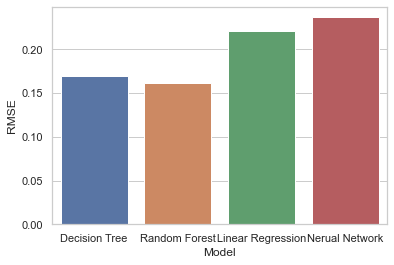

In [9]:
algos=dataset_cleaned['algo'].unique()
list_models=[{"name":"Decision Tree", "clf":decision_tree}, {"name":"Random Forest", "clf":random_forest},{"name":"Linear Regression",  "clf":linear_regression}, {"name":"Nerual Network", "clf":neural_network}]
names=[x['name'] for x in list_models]
rmse_per_algo=[]
for algo in algos:
    clf=[]
    print(f'-------------DATASET {algo}--------------')
    df=dataset_cleaned[dataset_cleaned['algo']==algo]
    df=dataset_cleaned.drop(columns=['algo','country','TDP','consumption','time'])
    df=df.dropna()
    #log scaling for heavy-tailed distributions
    for i in df.columns:
        if i!='F1':
            df[i]=np.log(1+df[i])
    X=df.loc[:,df.columns!='F1']
    y=df['F1']
    #selectin 7 features with highest mutual_information
    X = SelectKBest(mutual_info_regression, k=7).fit_transform(X, y)
    #Train-Test splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    #run_autoML(X_train,X_test,y_train,y_test)
    rmse_list=[]
    clf_list=[]
    #models training
    for model in list_models:
        clf,rmse=model['clf'](X_train,X_test, y_train,y_test)
        rmse_list.append(rmse)
        clf_list.append(clf)
    data={'Model':names, 'RMSE':rmse_list}
    df_plot=pd.DataFrame(data)
    rmse_per_algo.append(rmse_list)
    #plotting
    sns.set_theme(style="whitegrid")
    ax = sns.barplot(x="Model", y="RMSE", data=df_plot)
    filename='_'.join(algo.split())
    plt.savefig(f'./plots/F1_model_{filename}.png')
    rmse_per_algo.append(rmse_list)
    #saving best model
    pickle.dump(clf_list[np.argmin(np.array(rmse_list))], open(f'./models/F1_model_{filename}.sav', 'wb'))
    print(f'Min rmse:{np.min(rmse_list)}, Algorithm:{names[np.argmin(np.array(rmse_list))]}')
        

## 3. Consumption

In [10]:
dataset = pd.read_csv('ml_dataset.csv')
dataset_cleaned  = dataset[dataset.algo != 'Ensemble']
dataset_cleaned = dataset_cleaned.drop(columns=['did'])
dataset_cleaned['consumption']=dataset_cleaned['time']*dataset_cleaned['TDP']

-------------DATASET Decision Tree--------------


Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.


Min rmse:216.32364550025665, Algorithm:Random Forest
-------------DATASET Linear--------------


Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.


Min rmse:216.0778187277164, Algorithm:Random Forest
-------------DATASET Neural Network--------------


Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.


Min rmse:216.3729295757165, Algorithm:Random Forest
-------------DATASET Random Forest--------------


Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.


Min rmse:215.44789318818448, Algorithm:Random Forest


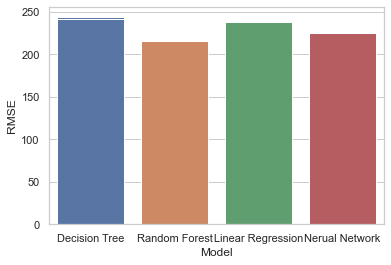

In [11]:
algos=dataset_cleaned['algo'].unique()
list_models=[{"name":"Decision Tree", "clf":decision_tree}, {"name":"Random Forest", "clf":random_forest},{"name":"Linear Regression",  "clf":linear_regression}, {"name":"Nerual Network", "clf":neural_network}]
names=[x['name'] for x in list_models]
rmse_per_algo=[]
for algo in algos:
    print(f'-------------DATASET {algo}--------------')
    df=dataset_cleaned[dataset_cleaned['algo']==algo]
    df=dataset_cleaned.drop(columns=['time','algo','country','TDP','F1'])
    df=df.dropna()
    #removing outliers in column consumption
    k=0.2
    Q1 = df['consumption'].quantile(0.25)
    Q3 = df['consumption'].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df['consumption'] < (Q1 - k * IQR)) |(df['consumption'] > (Q3 + k * IQR)))]
    #log scaling for heavy-tailed distributions
    for i in df.columns:
        if i!='consumption':
            df[i]=np.log(1+df[i])
    X=df.loc[:,df.columns!='consumption']
    y=df['consumption']
    #selectin 7 features with highest mutual_information
    X = SelectKBest(mutual_info_regression, k=7).fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    # run_autoML(X_train,X_test,y_train,y_test)
    rmse_list=[]
    clf_list=[]
    for model in list_models:
        clf,rmse=model['clf'](X_train,X_test, y_train,y_test)
        rmse_list.append(rmse)
        clf_list.append(clf)
    data={'Model':names, 'RMSE':rmse_list}
    #plotting
    df_plot=pd.DataFrame(data)
    sns.set_theme(style="whitegrid")
    ax = sns.barplot(x="Model", y="RMSE", data=df_plot)
    filename='_'.join(algo.split())
    plt.savefig(f'./plots/consumption_model_{filename}.png')
    rmse_per_algo.append(rmse_list)
    #save best model
    pickle.dump(clf_list[np.argmin(np.array(rmse_list))], open(f'./models/consumption_model_{filename}.sav', 'wb'))
    print(f'Min rmse:{np.min(rmse_list)}, Algorithm:{names[np.argmin(np.array(rmse_list))]}')
    